In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [21]:
df= pd.read_csv('CC_GENERAL.csv')

In [22]:
df.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [23]:
df.shape #8950 rows, 18 columns

(8950, 18)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [25]:
df=df.drop(['CUST_ID'], axis=1)

### Handle with Missing Values

In [26]:
"""
We have two options to get solution how to handle with missing values
1- Using  Dataframe.fillna()  from the pandas library.
2- Using  SimpleImputer from sklearn.impute (this is only useful if the data is present in the form of csv file)
"""
df.isnull().head()
#df.notnull().head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    False              False      False             False   
1    False              False      False             False   
2    False              False      False             False   
3    False              False      False             False   
4    False              False      False             False   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   False         False                False   
1                   False         False                False   
2                   False         False                False   
3                   False         False                False   
4                   False         False                False   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       False                             False   
1                       False                             False   
2                       False                             False   
3                       False                             False   
4                       False                             False   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   False             False          False         False   
1                   False             False          False         False   
2                   False             False          False         False   
3                   False             False          False         False   
4                   False             False          False         False   

   PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0     False             False             False   False  
1     False             False             False   False  
2     False             False             False   False  
3     False              True             False   False  
4     False             False             False   False

In [27]:
df.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [28]:
df[df['MINIMUM_PAYMENTS'].isnull()]

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
3     1666.670542           0.636364    1499.00           1499.00   
45    2242.311686           1.000000     437.00             97.00   
47    3910.111237           1.000000       0.00              0.00   
54       6.660517           0.636364     310.00              0.00   
55    1311.995984           1.000000    1283.90           1283.90   
...           ...                ...        ...               ...   
8919    14.524779           0.333333     152.00            152.00   
8929   371.527312           0.333333       0.00              0.00   
8935   183.817004           1.000000     465.90              0.00   
8944   193.571722           0.833333    1012.73           1012.73   
8946    19.183215           1.000000     300.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
3                        0.0    205.788017             0.083333   
45                     340.0    184.648692             0.333333   
47                       0.0   1980.873201             0.000000   
54                     310.0      0.000000             0.666667   
55                       0.0      0.000000             0.250000   
...                      ...           ...                  ...   
8919                     0.0      0.000000             0.333333   
8929                     0.0   1465.407927             0.000000   
8935                   465.9      0.000000             1.000000   
8944                     0.0      0.000000             0.333333   
8946                   300.0      0.000000             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
3                       0.083333                          0.000000   
45                      0.083333                          0.333333   
47                      0.000000                          0.000000   
54                      0.000000                          0.666667   
55                      0.250000                          0.000000   
...                          ...                               ...   
8919                    0.333333                          0.000000   
8929                    0.000000                          0.000000   
8935                    0.000000                          0.833333   
8944                    0.333333                          0.000000   
8946                    0.000000                          0.833333   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
3                   0.083333                 1              1        7500.0   
45                  0.166667                 2              5        2400.0   
47                  0.500000                 7              0        4200.0   
54                  0.000000                 0              8        1000.0   
55                  0.000000                 0              6        6000.0   
...                      ...               ...            ...           ...   
8919                0.000000                 0              2        1500.0   
8929                0.166667                 5              0        1500.0   
8935                0.000000                 0              6        1500.0   
8944                0.000000                 0              2        4000.0   
8946                0.000000                 0              6        1000.0   

        PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
3       0.000000               NaN               0.0      12  
45      0.000000               NaN               0.0      12  
47      0.000000               NaN               0.0      12  
54    417.016763               NaN               0.0      12  
55      0.000000               NaN               0.0      12  
...          ...               ...               ...     ...  
8919    0.000000               NaN               0.0       6  
8929    0.000000               NaN               0.0       6  
8935    0.000000   

In [29]:
#how to handle missing values
#df.dropna(how='any')
#df.dropna('how='all')
#OR
new_df=df.fillna(0)

In [30]:
new_df.head()

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000          0.000000          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [31]:
# 2.option is simpleImputer from sklearn
# we can use mean( avarage)value to fill nan , also -> it can give a better solution
from sklearn.impute import SimpleImputer

imputer=SimpleImputer(missing_values=np.nan, strategy='median')

#data=df.values

In [32]:
X = df['MINIMUM_PAYMENTS'].values.reshape(-1,1)
""""""
#X=data[:,:-1]
#y=data[:,-1]
X = imputer.fit_transform(X) 

df['MINIMUM_PAYMENTS_NEW'] = X

"""
imputer.fit(X)
X_trans=imputer.transform(X)
'Missing : {}'.format(sum(np.isnan(X).flatten()))
'Missing : {}'.format(sum(np.isnan(X_trans).flatten()))
df['MINIMUM_PAYMENTS_NEW'] = X
"""



"\nimputer.fit(X)\nX_trans=imputer.transform(X)\n'Missing : {}'.format(sum(np.isnan(X).flatten()))\n'Missing : {}'.format(sum(np.isnan(X_trans).flatten()))\ndf['MINIMUM_PAYMENTS_NEW'] = X\n"

In [33]:
df['MINIMUM_PAYMENTS_NEW']

0        139.509787
1       1072.340217
2        627.284787
3        312.343947
4        244.791237
           ...     
8945      48.886365
8946     312.343947
8947      82.418369
8948      55.755628
8949      88.288956
Name: MINIMUM_PAYMENTS_NEW, Length: 8950, dtype: float64

In [34]:
X1 = df['CREDIT_LIMIT'].values.reshape(-1,1)

X1 = imputer.fit_transform(X1) 

df['CREDIT_LIMIT_NEW'] = X1

df = df.drop(['CREDIT_LIMIT','MINIMUM_PAYMENTS'],axis = 1)

In [35]:
df['CREDIT_LIMIT_NEW']

0       1000.0
1       7000.0
2       7500.0
3       7500.0
4       1200.0
         ...  
8945    1000.0
8946    1000.0
8947    1000.0
8948     500.0
8949    1200.0
Name: CREDIT_LIMIT_NEW, Length: 8950, dtype: float64

In [36]:
df.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
PAYMENTS                            0
PRC_FULL_PAYMENT                    0
TENURE                              0
MINIMUM_PAYMENTS_NEW                0
CREDIT_LIMIT_NEW                    0
dtype: int64

### Data Visualisation

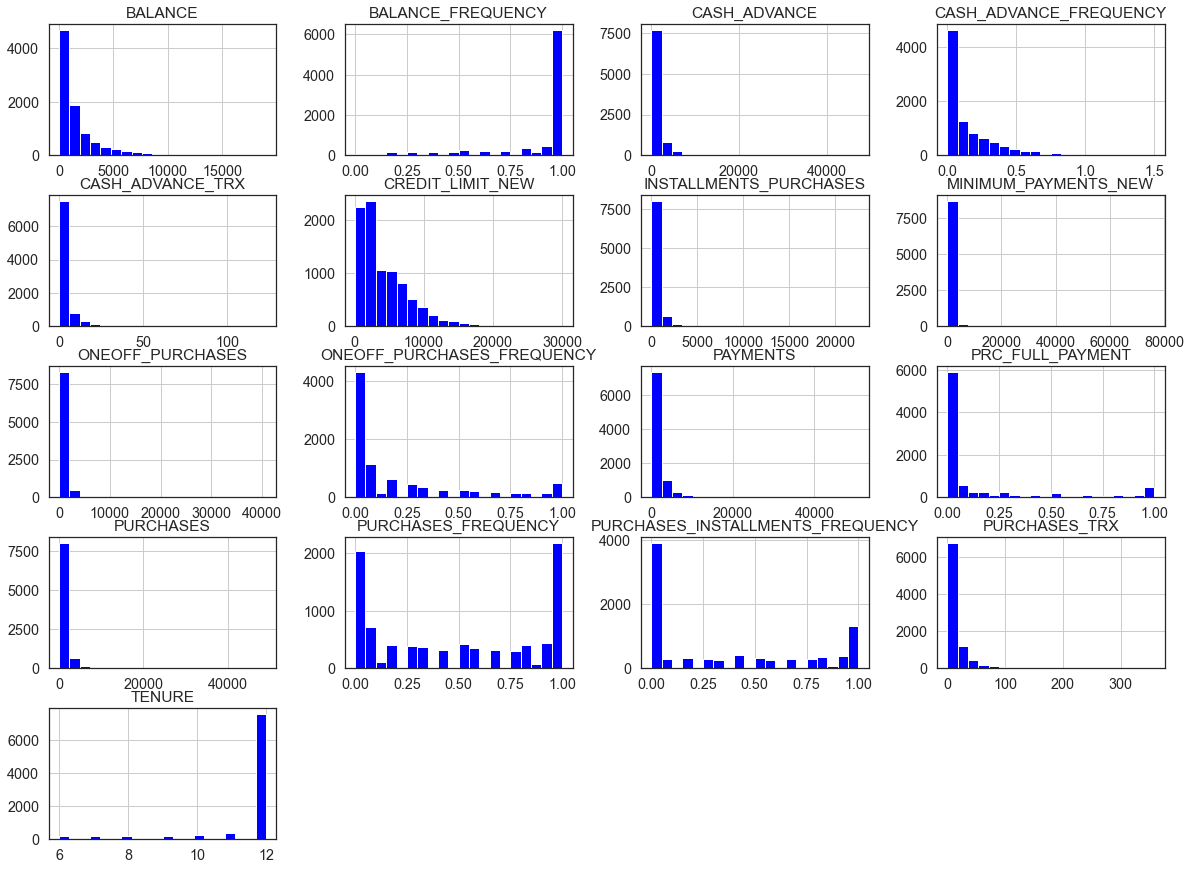

In [37]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,15)})
ax=df.hist(bins=20,color='blue' )

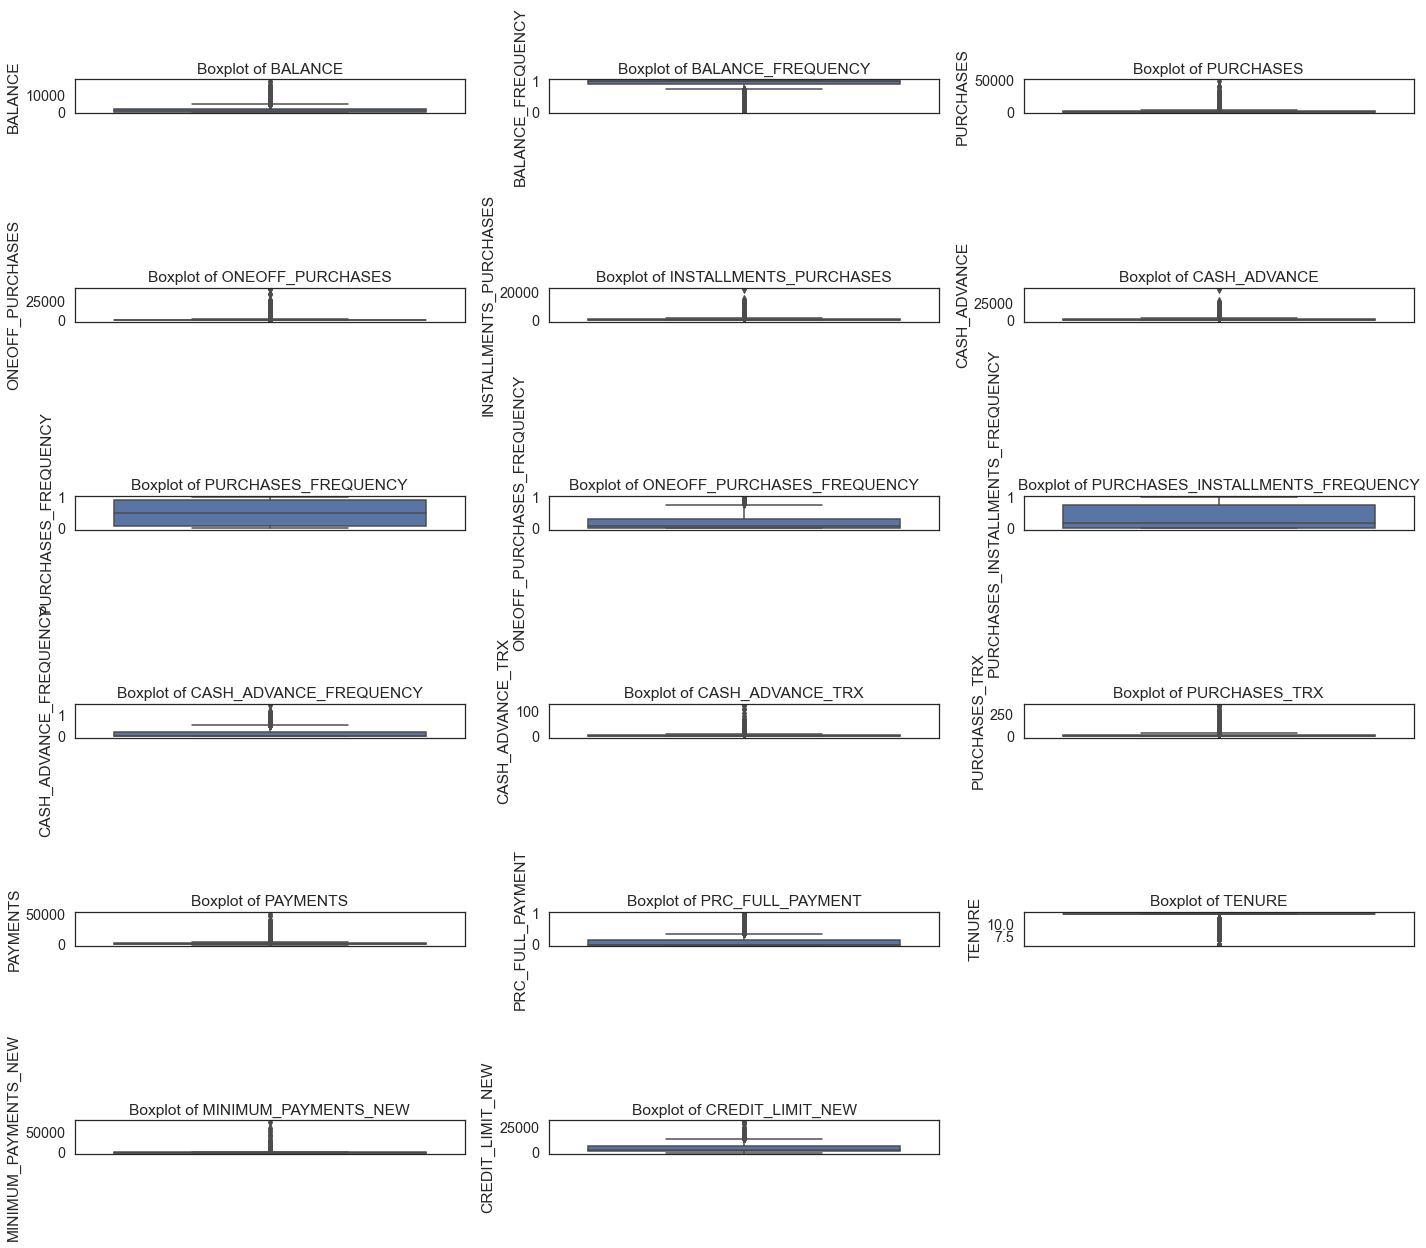

In [40]:
plt.figure(figsize = (20,16))
Features = df.columns
for i in range(len(Features)):
    plt.subplot(6,3, i + 1)
    sns.boxplot(y = df[Features[i]], data = df)
    plt.title(f"Boxplot of {Features[i]}")
    plt.tight_layout()

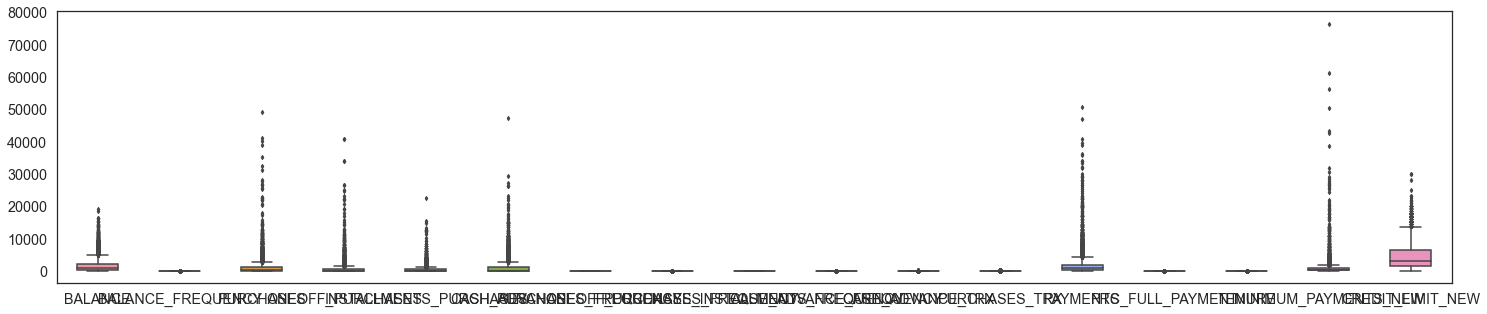

In [39]:
fig, ax = plt.subplots(figsize=(25,5))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=3)

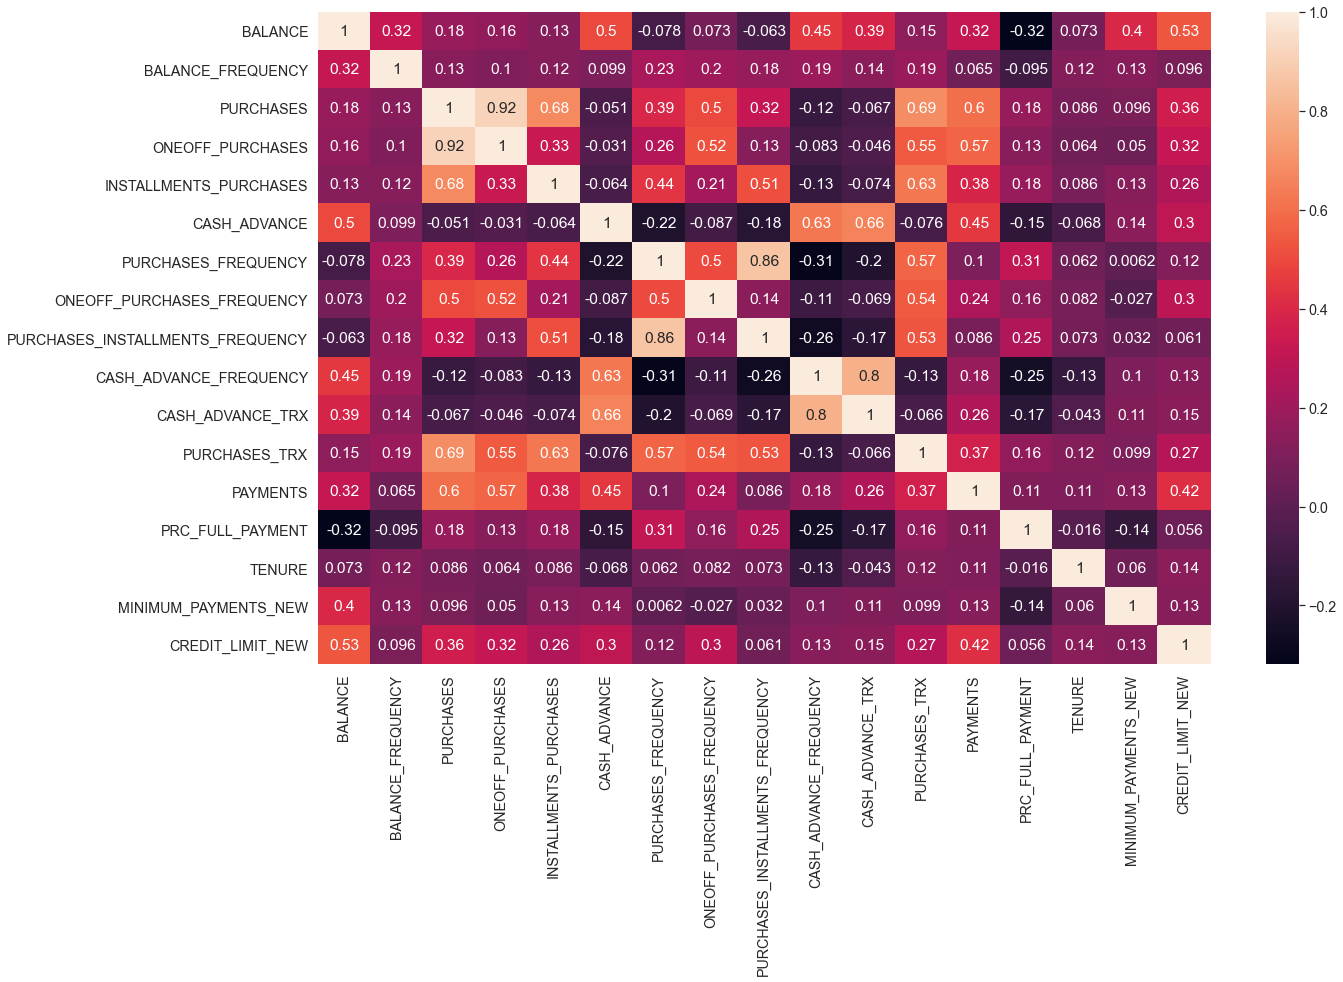

In [41]:
plt.figure(figsize=(20,12))
corr_df = df.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

### Preprocessing

In [42]:
import seaborn as sns; sns.set()
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
df_sc=sc.fit_transform(df)

In [43]:
from sklearn.preprocessing import StandardScaler, normalize
df_scaled = normalize(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     0.039353           0.000787   0.091790          0.000000   
1     0.293876           0.000083   0.000000          0.000000   
2     0.310798           0.000125   0.096307          0.096307   
3     0.208886           0.000080   0.187872          0.187872   
4     0.504284           0.000617   0.009867          0.009867   
...        ...                ...        ...               ...   
8945  0.025197           0.000884   0.257438          0.000000   
8946  0.016485           0.000859   0.257808          0.000000   
8947  0.022773           0.000811   0.140538          0.000000   
8948  0.026524           0.001642   0.000000          0.000000   
8949  0.186405           0.000333   0.546776          0.546776   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                   0.091790      0.000000             0.000160   
1                   0.000000      0.591240             0.000000   
2                   0.000000      0.000000             0.000125   
3                   0.000000      0.025792             0.000010   
4                   0.000000      0.000000             0.000051   
...                      ...           ...                  ...   
8945                0.257438      0.000000             0.000884   
8946                0.257808      0.000000             0.000859   
8947                0.140538      0.000000             0.000811   
8948                0.000000      0.072055             0.000000   
8949                0.000000      0.063538             0.000333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.000080   
1                       0.000000                          0.000000   
2                       0.000125                          0.000000   
3                       0.000010                          0.000000   
4                       0.000051                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.000737   
8946                    0.000000                          0.000716   
8947                    0.000000                          0.000649   
8948                    0.000000                          0.000000   
8949                    0.000333                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  PAYMENTS  \
0                   0.000000          0.000000       0.001924  0.194165   
1                   0.000023          0.000367       0.000000  0.376516   
2                   0.000000          0.000000       0.001495  0.077485   
3                   0.000010          0.000125       0.000125  0.000000   
4                   0.000000          0.000000       0.000617  0.418329   
...                      ...               ...            ...       ...   
8945                0.000000          0.000000       0.005306  0.287924   
8946                0.000000          0.000000       0.005156  0.237064   
8947                0.000000          0.000000       0.004866  0.079097   
8948                0.000328          0.003942       0.000000  0.103572   
8949                0.000167          0.001000       0.011503  0.031591   

      PRC_FULL_PAYMENT    TENURE  MINIMUM_PAYMENTS_NEW  CREDIT_LIMIT_NEW  
0             0.000000  0.011546              0.134230          0.962156  
1             0.000020  0.001101              0.098404          0.642358  
2             0.000000  0.001495              0.078135          0.934206  
3             0.000000  0.001504              0.039147          0.939987  
4             0.000000  0.007400              0.150963          0.740040  
...                ...       ...                   ...               ...  
8945          0.000442  0.005306              0.043230          0.884301  
8946          0.000000  0.005156              0.268415          0.8

### K- Means

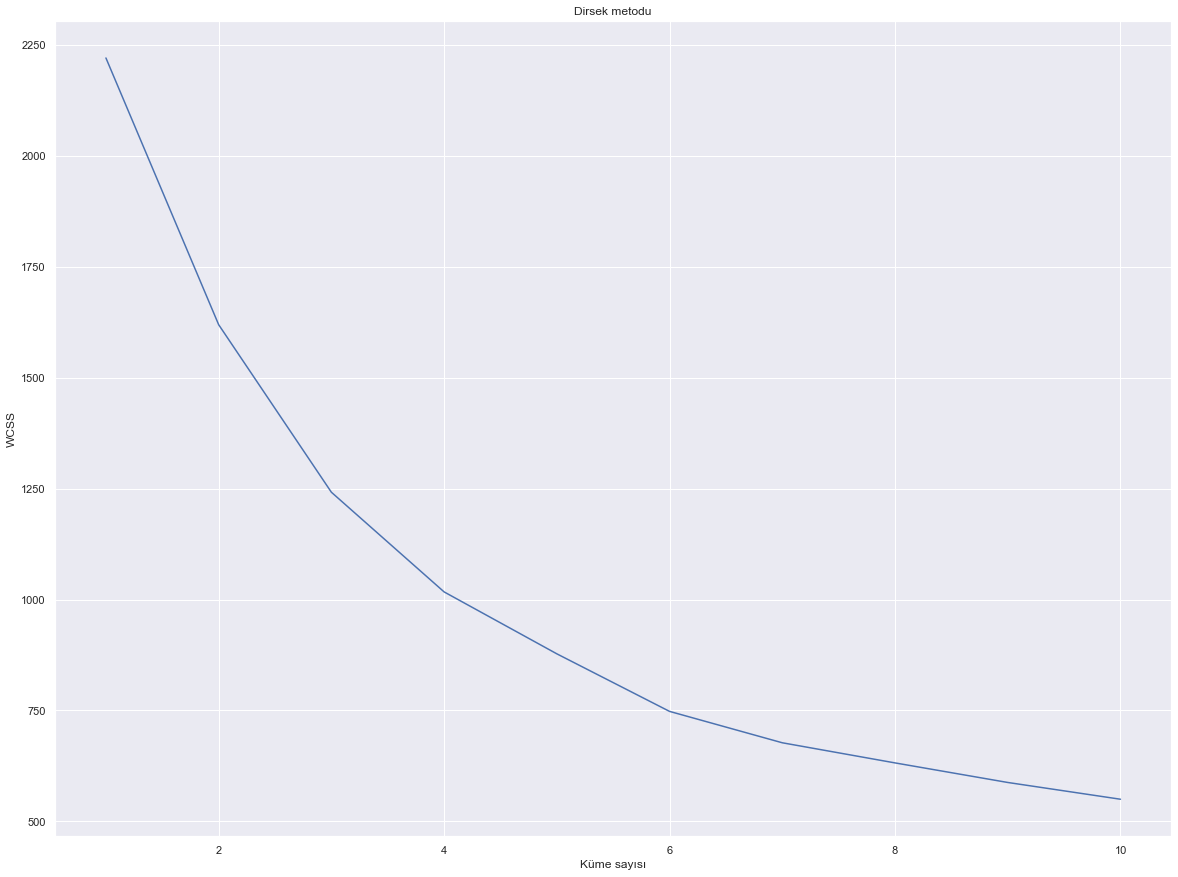

In [44]:
from sklearn.cluster import KMeans
#we want to decide how many cluster we need!
#Elbow method

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++',random_state = 42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Dirsek metodu')
plt.xlabel('Küme sayısı')
plt.ylabel('WCSS')
plt.show()

In [45]:
#First elbow method shows us 6 number cluster can be good

kmeans_1 = KMeans(n_clusters=6, init="k-means++", random_state = 42)
y_kmeans_1 = kmeans.fit_predict( df_scaled ) #y_predict


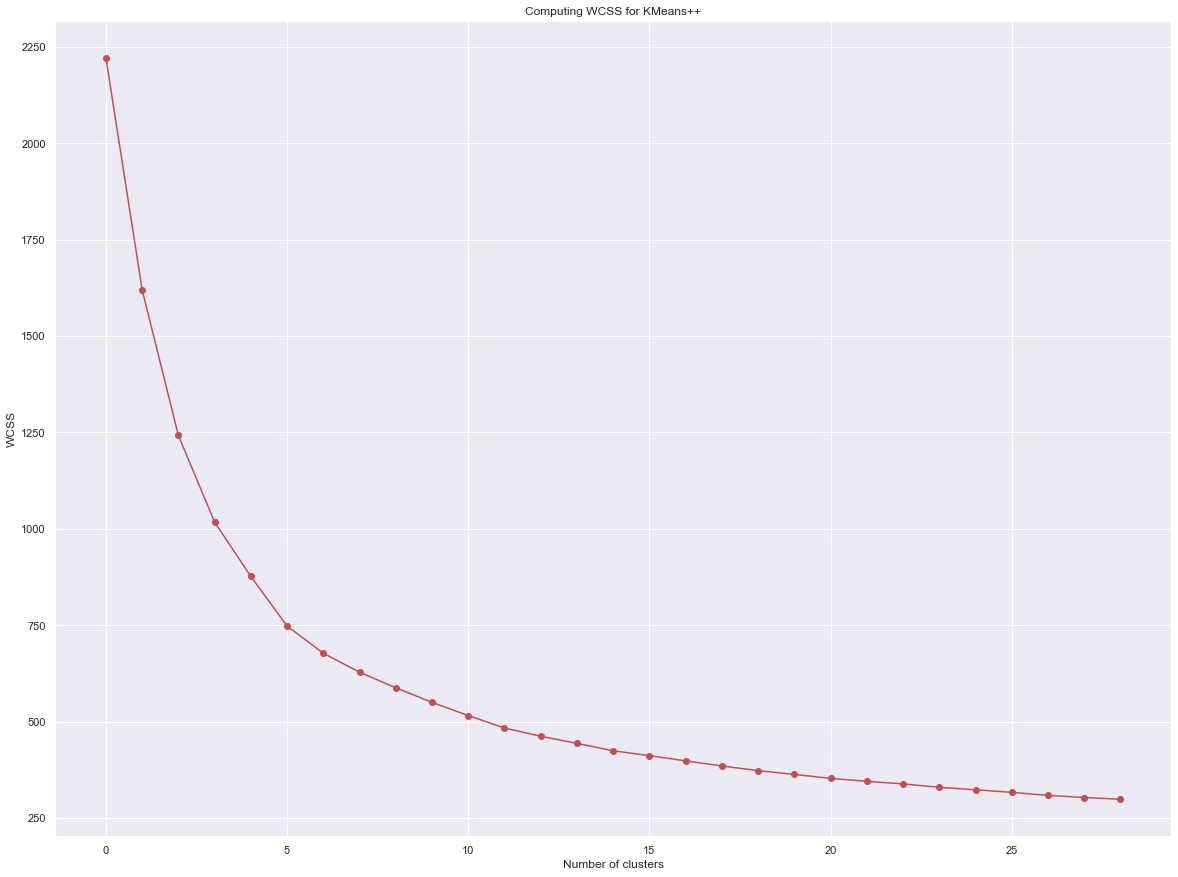

In [46]:
wcss = []
for ii in range( 1, 30 ):
    kmeans = KMeans(n_clusters=ii, init="k-means++", n_init=10, max_iter=300) 
    kmeans.fit_predict( df_scaled )
    wcss.append( kmeans.inertia_ )
    
plt.plot( wcss, 'ro-', label="WCSS")
plt.title("Computing WCSS for KMeans++")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [47]:
kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300) 
y_pred = kmeans.fit_predict( df_scaled )

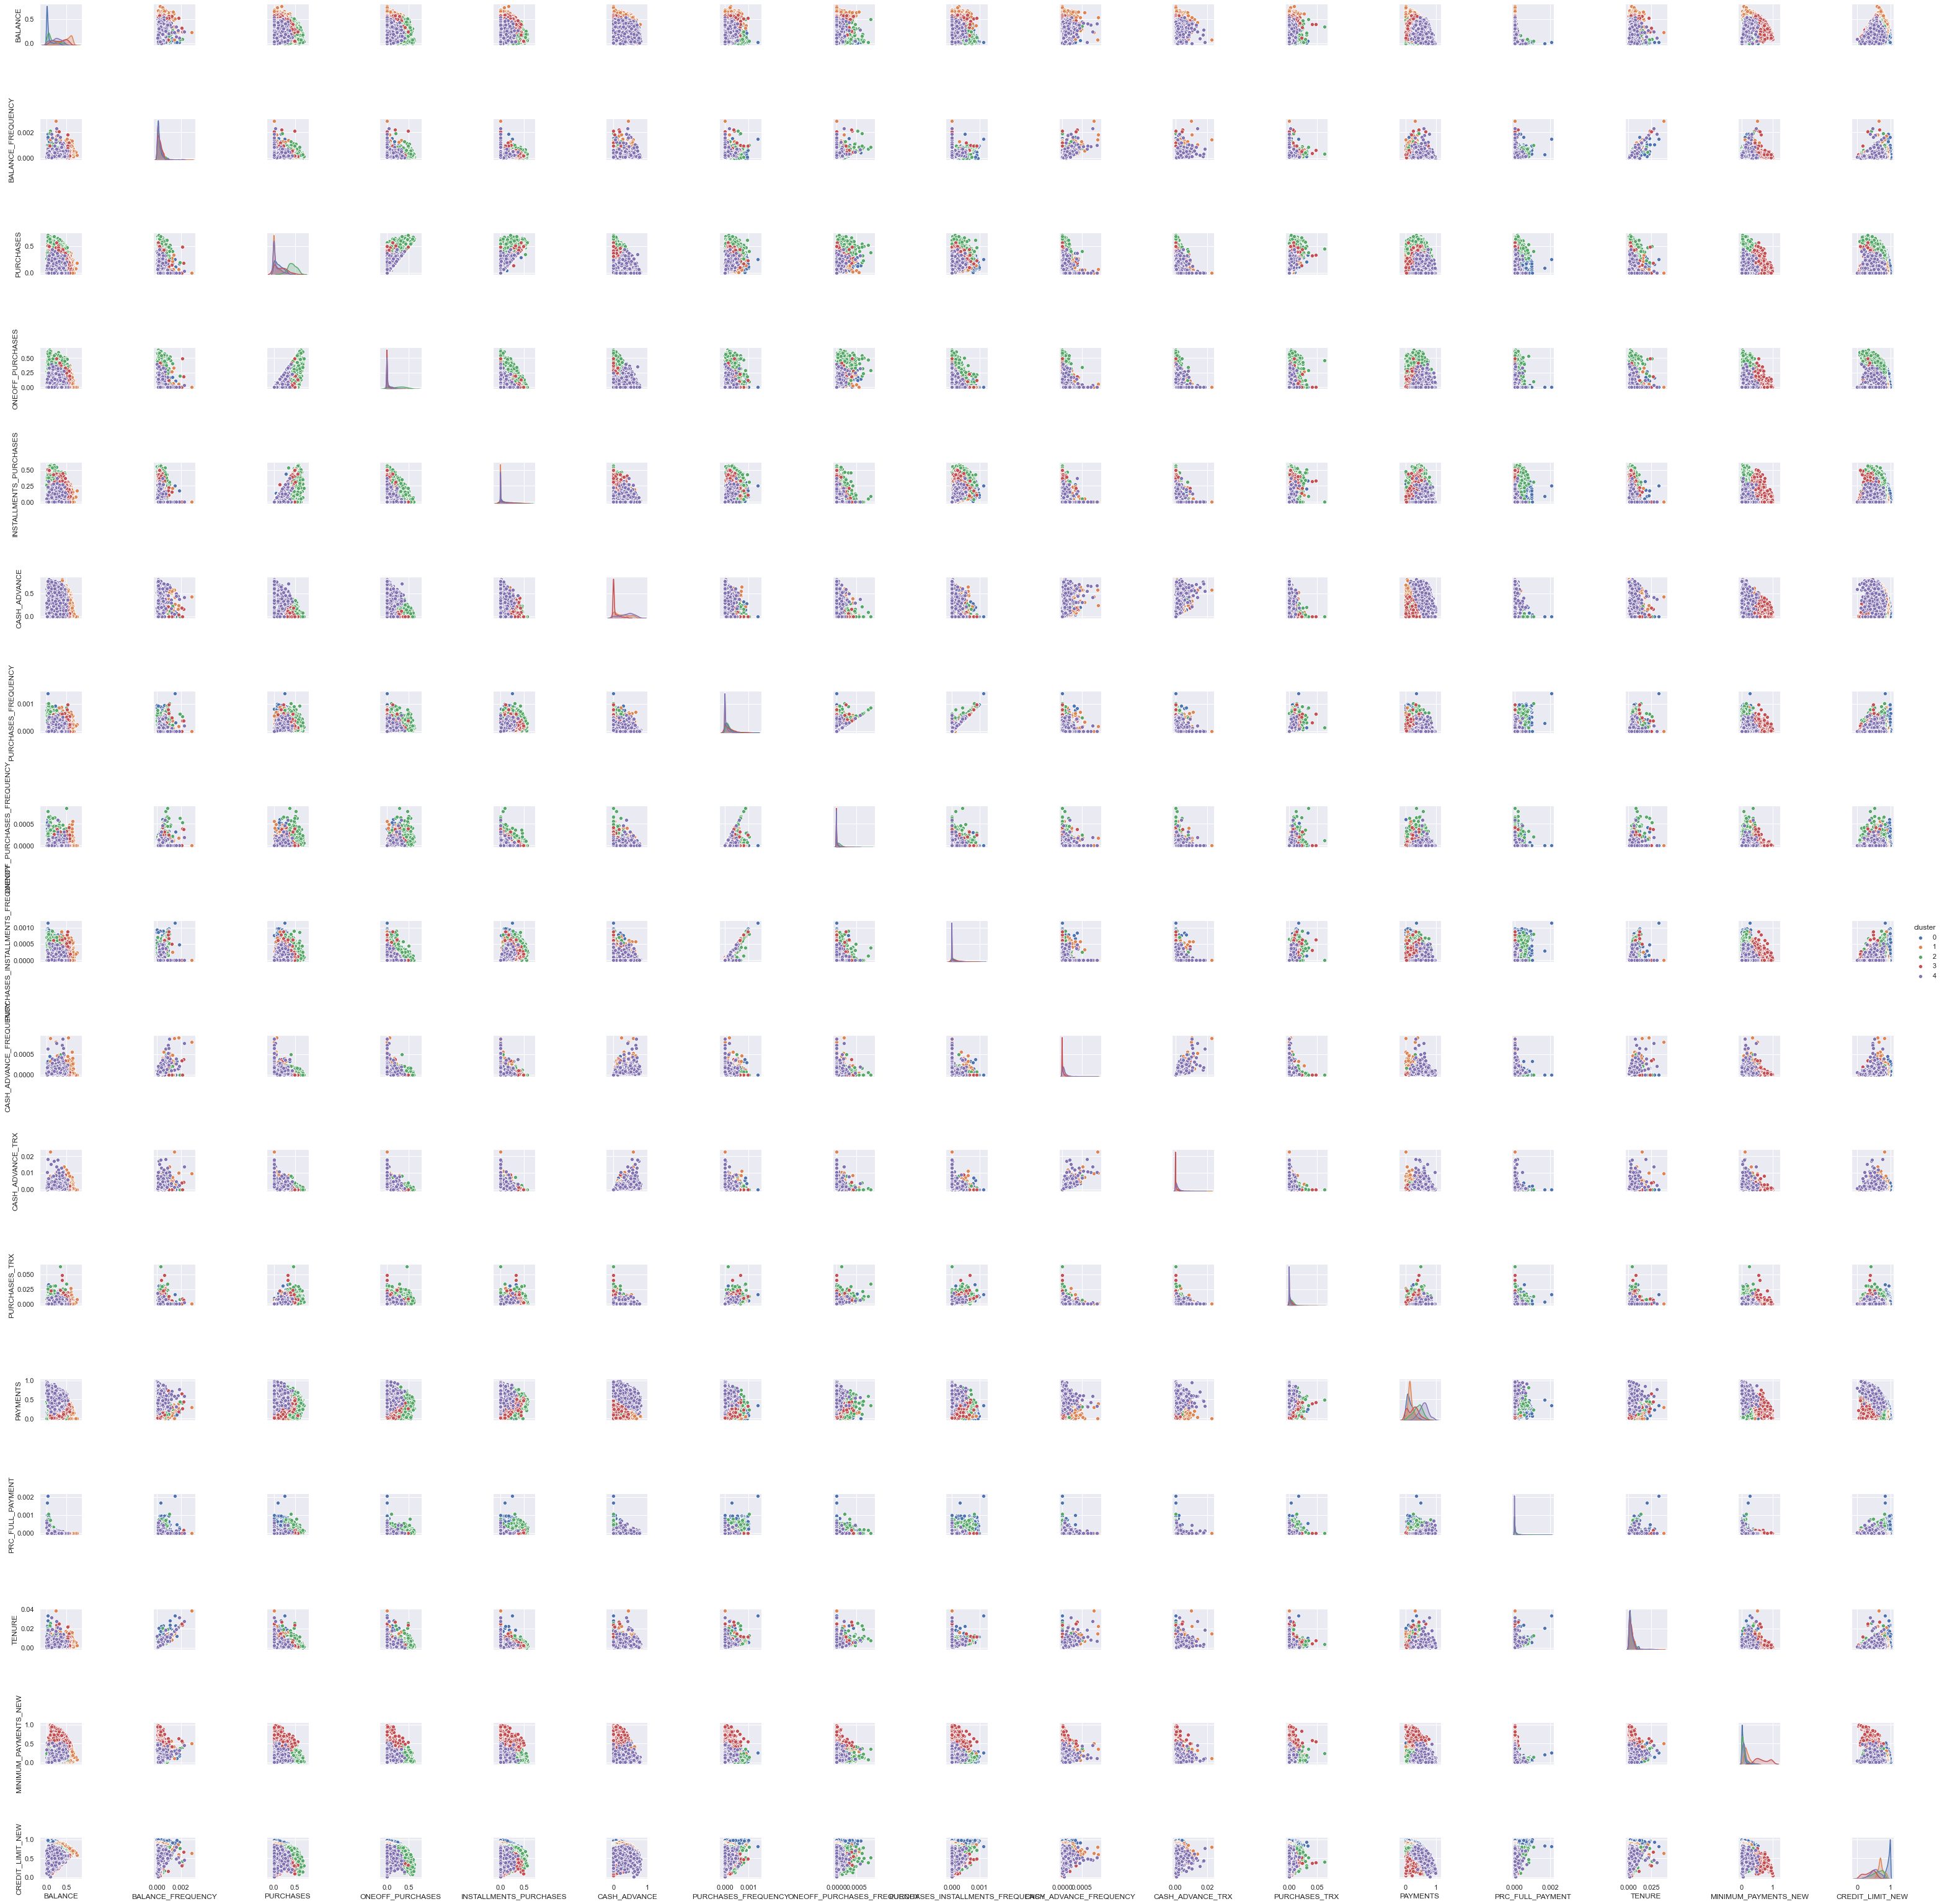

In [80]:
df_scaled["cluster"] = y_pred
cols = list(df_scaled.columns)
sns.pairplot( df_scaled[ cols ], hue="cluster" , palette='deep')

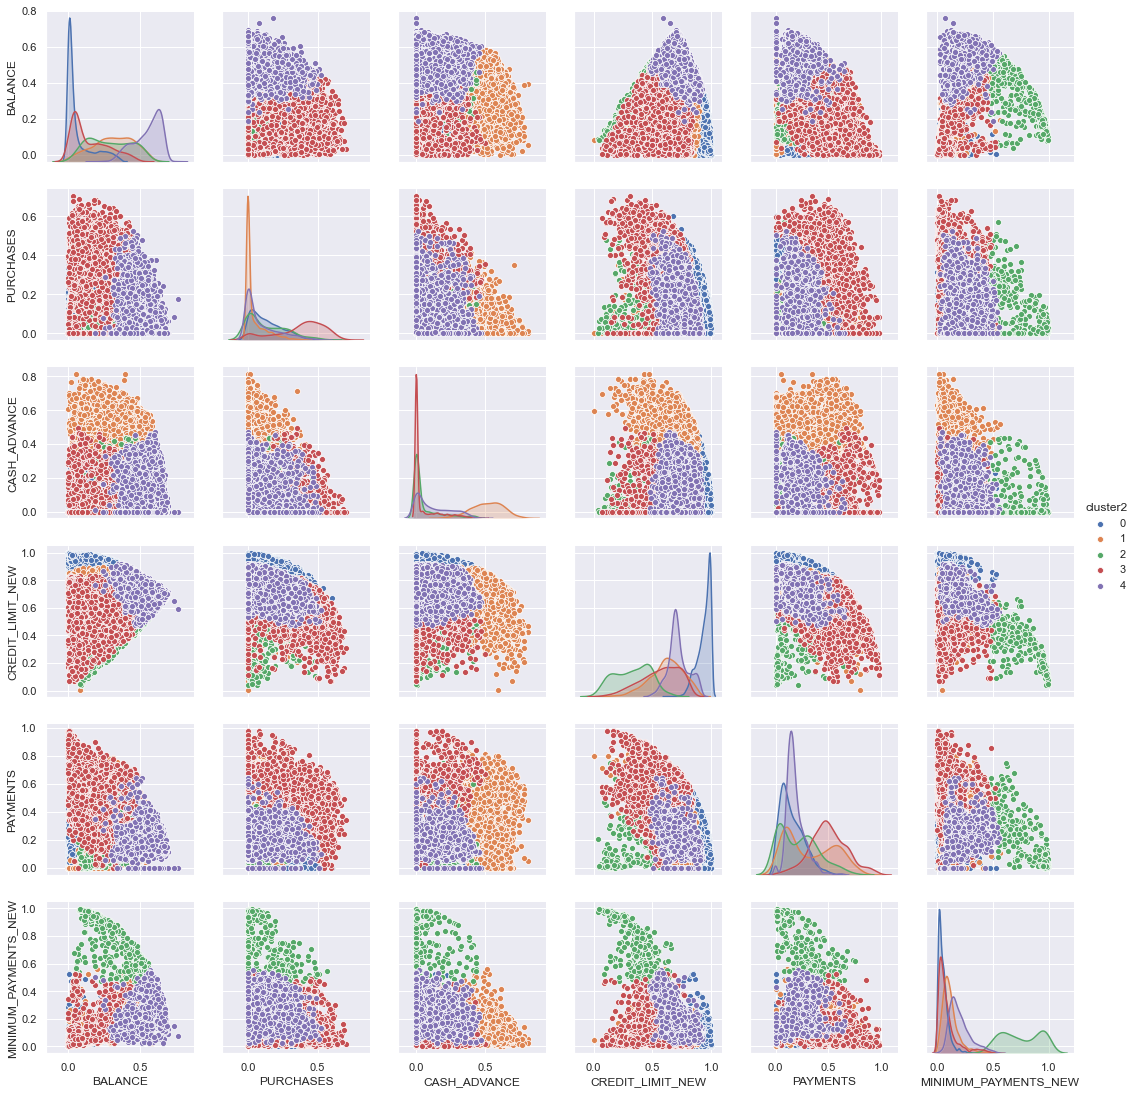

In [82]:
best_cols = ["BALANCE", "PURCHASES", "CASH_ADVANCE","CREDIT_LIMIT_NEW", "PAYMENTS", "MINIMUM_PAYMENTS_NEW"]
#we have best columns which are measure and classify 
#we try to run only best columns

kmeans = KMeans(n_clusters=5, init="k-means++", n_init=10, max_iter=300)
y_pred = kmeans.fit_predict( df_scaled[best_cols] )

df_scaled["cluster2"] = y_pred
best_cols.append("cluster2")
sns.pairplot( df_scaled[ best_cols ], hue="cluster2" , palette='deep')

### K- Means with PCA

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [49]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [50]:
pca = PCA(n_components=2)
principal_comp = pca.fit_transform(scaled_data)
#pca = PCA(n_components=2).fit_transform(scaled_data)
#var_exp = pca.explained_variance_ratio_
#print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(principal_comp.explained_variance_ratio_)))

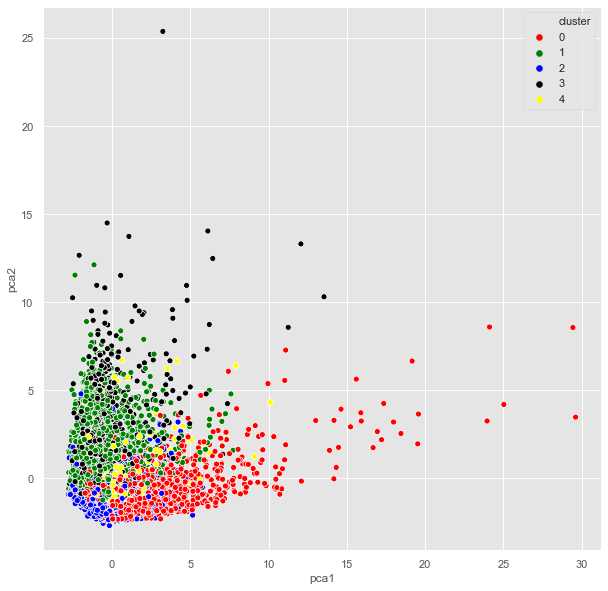

In [51]:
pca_df = pd.DataFrame(data=principal_comp,columns=['pca1','pca2'])
labels = kmeans.labels_

pca_df = pd.concat([pca_df,pd.DataFrame({'cluster':labels})], axis = 1)
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "cluster", data = pca_df, palette =['red','green','blue','black','yellow'])
plt.show()

In [55]:
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(scaled_data)

print ('Cumulative variance explained by 10 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 10 principal components: 47.61%


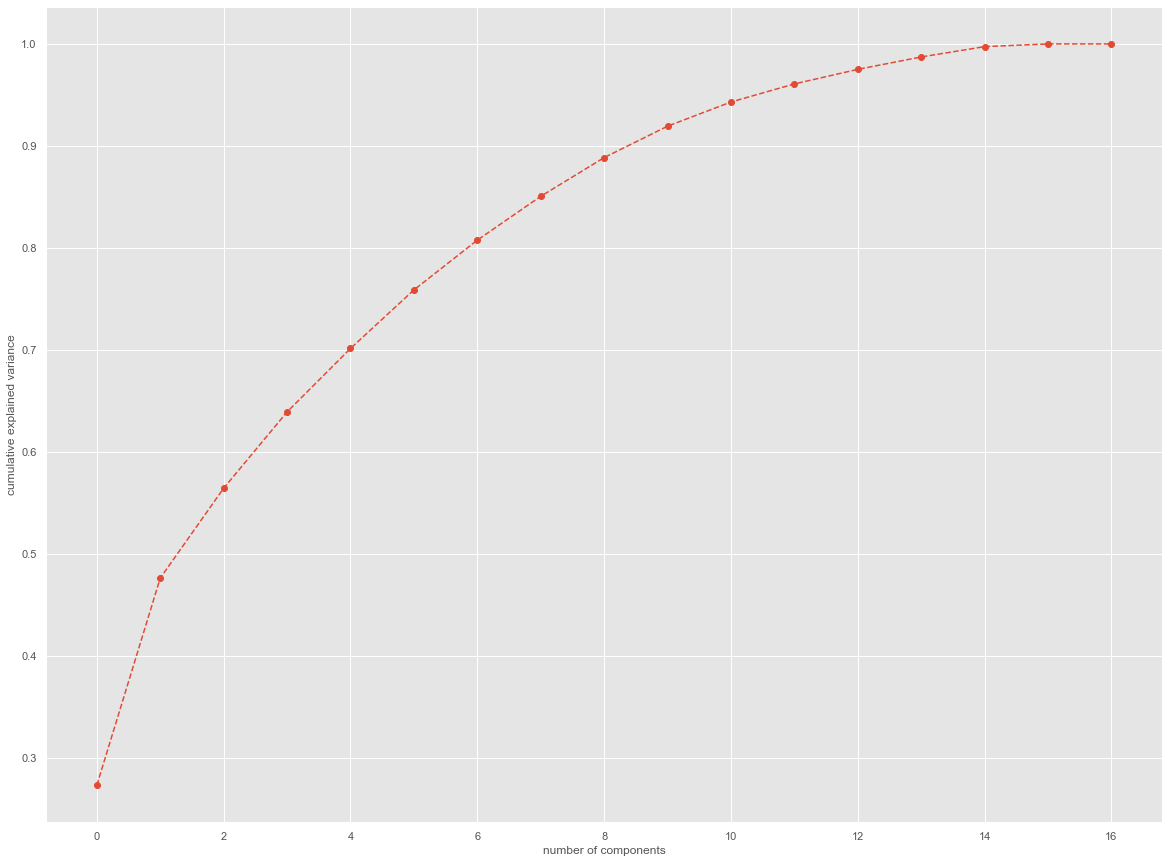

In [56]:
pca=PCA(whiten=True).fit(scaled_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_),marker='o',linestyle='--')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [57]:
pca_10 = PCA(10)
pca_10_result = pca_10.fit_transform(scaled_data)

print ('Cumulative variance explained by 10 principal components: {:.2%}'.format(np.sum(pca_10.explained_variance_ratio_)))

Cumulative variance explained by 10 principal components: 91.93%


In [58]:
pca10=PCA(n_components=10)
scores_pca=pca10.fit_transform(scaled_data)

In [59]:
scores_pca

array([[-1.68364879e+00, -1.07224148e+00,  4.75660084e-01, ...,
        -1.89517812e-02,  1.18335937e-01, -7.81956004e-02],
       [-1.13408493e+00,  2.50914981e+00,  6.02216308e-01, ...,
         1.76153547e-01,  6.74472271e-01, -7.77929470e-01],
       [ 9.69394988e-01, -3.83576903e-01,  9.09697616e-02, ...,
        -2.29364329e-01, -8.67802735e-01, -1.74404835e-03],
       ...,
       [-9.28985122e-01, -1.80804835e+00, -4.58242377e-01, ...,
        -2.92831922e-01,  8.10029122e-01, -8.30135631e-01],
       [-2.33784475e+00, -6.53611332e-01,  9.82831153e-01, ...,
         2.30862515e-01,  1.20567473e+00,  2.68662638e-01],
       [-5.58026533e-01, -4.00646098e-01,  1.03364560e+00, ...,
        -4.04444715e-01, -8.31975961e-01,  3.46160674e-01]])

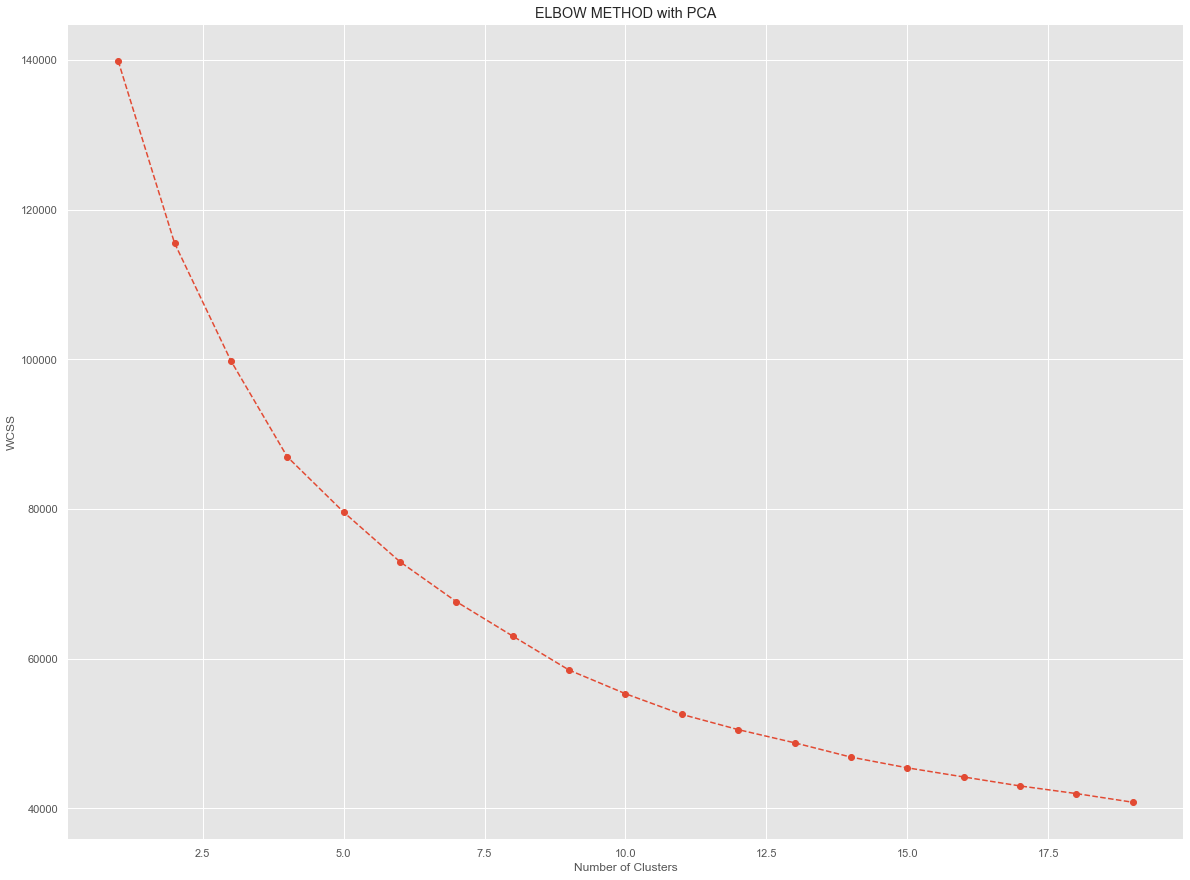

In [60]:
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(scores_pca)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,20), wcss,marker='o',linestyle='--')
plt.title('ELBOW METHOD with PCA')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [61]:
kmeans_pca = KMeans(n_clusters=5,random_state=42,init='k-means++')
y_kmeans = kmeans_pca.fit(scores_pca)

In [62]:
y_kmeans

KMeans(n_clusters=5, random_state=42)

In [63]:
kmeans_labels = kmeans_pca.fit_predict(scores_pca)
pd.Series(kmeans_labels).value_counts()

1    3936
2    2432
3    1378
4    1118
0      86
dtype: int64

In [64]:
df_pca_new=pd.DataFrame(scaled_data)

In [65]:
df_segm_pca_kmeans=pd.concat([df_pca_new.reset_index(drop=True),pd.DataFrame(scores_pca)],axis=1)
df_segm_pca_kmeans.columns.values[-10: ]=['100','101','102','103','104','105','106','107','108','109']

In [66]:
df_segm_pca_kmeans['cluster K-Means PCA']=kmeans_pca.labels_

In [67]:
df_segm_pca_kmeans.head(10)

0         1         2         3         4         5         6  \
0 -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1  0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2  0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3  0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4 -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   
5  0.117878  0.518084  0.154492 -0.356934  1.019822 -0.466786  0.439310   
6 -0.450277  0.518084  2.849408  3.500548  0.306664 -0.466786  1.269843   
7  0.124520  0.518084 -0.265388 -0.356934  0.027792 -0.466786  1.269843   
8 -0.264026  0.518084 -0.066330  0.041603 -0.233408 -0.466786 -0.391225   
9 -0.678504 -1.400712  0.130303  0.415209 -0.454576 -0.466786 -0.806490   

          7         8         9  ...       101       102       103       104  \
0 -0.678661 -0.707313 -0.675349  ... -1.072241  0.475660  0.679928  0.043195   
1 -0.678661 -0.916995  0.573963  ...  2.509150  0.602216 -0.109542  0.662638   
2  2.673451 -0.916995 -0.675349  ... -0.383577  0.090970  1.238359 -2.166584   
3 -0.399319 -0.916995 -0.258913  ...  0.004648  1.499800  1.075271  0.225828   
4 -0.399319 -0.916995 -0.675349  ... -0.683795  0.347927  1.013642 -0.453816   
5 -0.678661  0.550784 -0.675349  ... -0.776378 -1.149597  0.814987  0.826829   
6  2.673451  1.599199 -0.675349  ... -0.704560  2.090422 -0.767042 -1.076941   
7 -0.678661  1.599199 -0.675349  ... -1.288145 -1.830085  0.186117  0.182078   
8 -0.399319 -0.287947 -0.675349  ... -0.459496  0.178103  1.031193 -0.226924   
9 -0.119974 -0.916995 -0.675349  ... -0.366721  1.943200  0.993613  0.404646   

        105       106       107       108       109  cluster K-Means PCA  
0  0.068069  0.822155 -0.018952  0.118336 -0.078196                    1  
1 -1.102255 -0.384282  0.176154  0.674472 -0.777929                    4  
2 -0.320185 -1.542496 -0.229364 -0.867803 -0.001744                    3  
3 -0.171540 -0.236644 -0.690410 -0.064245  0.393690                    1  
4  0.077004  0.698278  0.245311  0.578032 -0.122073                    1  
5  0.426485  0.777943  0.062261  0.447065 -0.210587                    2  
6 -1.067958 -1.396153  1.146328  0.247923 -0.087832                    3  
7 -0.065654  0.420092 -0.531586  0.134970 -0.963048                    2  
8 -0.301863 -0.090198 -0.423516  0.720167 -0.093488                    1  
9 -0.637191 -0.766981 -1.066420 -0.285995  0.268001                    1  

[10 rows x 28 columns]

In [68]:
df_segm_pca_kmeans['cluster']=df_segm_pca_kmeans['cluster K-Means PCA'].map({0:'first',
                                                                             1:'second',
                                                                             2:'third',
                                                                             3:'fourth',
                                                                             4:'fifth'})

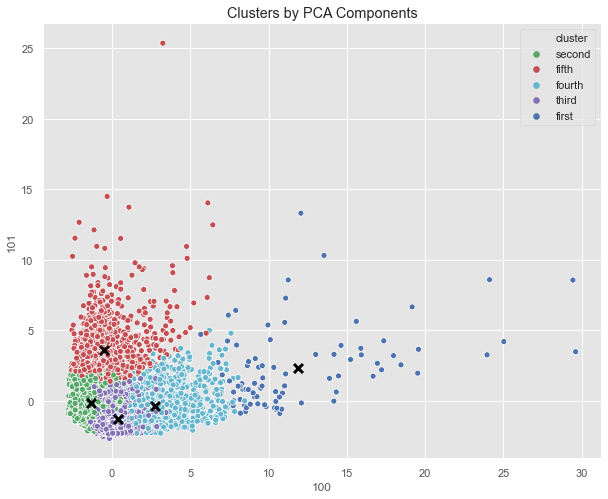

In [69]:
x_axis=df_segm_pca_kmeans[100]
y_axis=df_segm_pca_kmeans[101]
plt.figure(figsize=(10, 8))
sns.scatterplot(x_axis, y_axis, hue=df_segm_pca_kmeans['cluster'], palette=['g','r','c','m','b'])
centers_pca= kmeans_pca.cluster_centers_
plt.scatter(centers_pca[:, 0], centers_pca[:, 1],
            marker='x', s=80, linewidths=4,
            color='black', zorder=10,lw=3)
plt.title('Clusters by PCA Components')
plt.show()

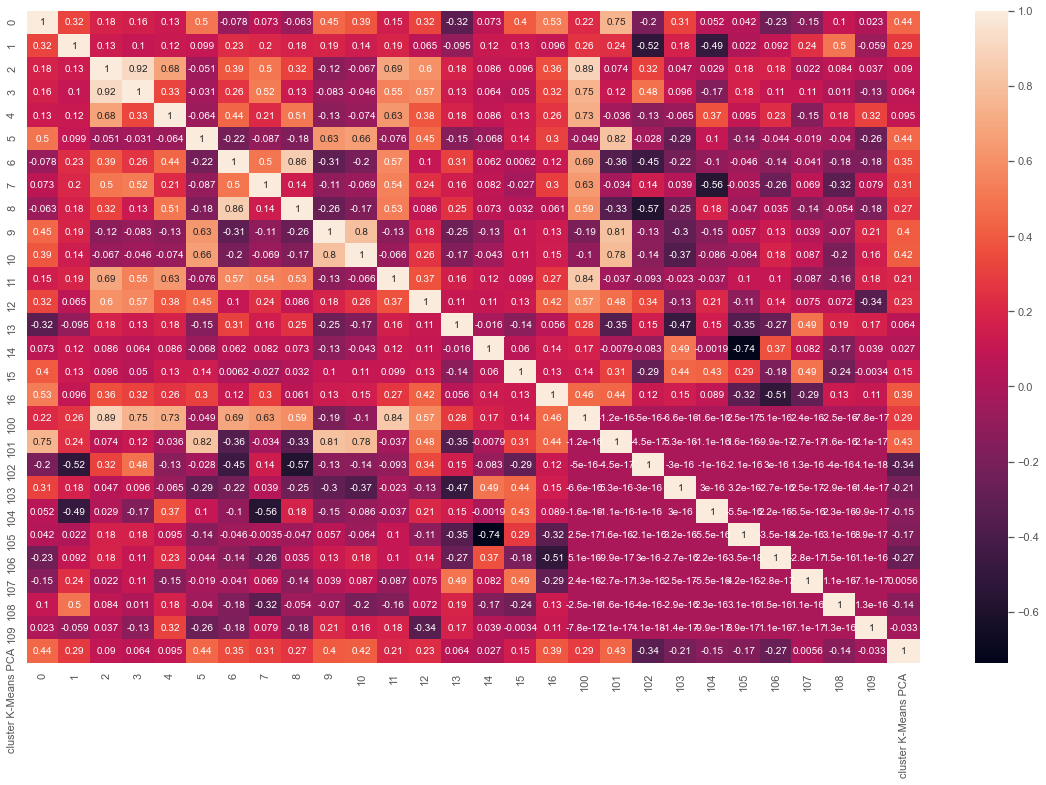

In [70]:
plt.figure(figsize=(20,12))
corr_df = df_segm_pca_kmeans.corr()
sns.heatmap(corr_df,annot=True)
plt.show()

In [75]:
from sklearn.metrics.pairwise import cosine_similarity

kmean= KMeans(6)
kmean.fit(scaled_data)
labels=kmean.labels_
clusters=pd.concat([df, pd.DataFrame({'cluster':labels})], axis=1)

dist = 1 - cosine_similarity(scaled_data)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)

In [76]:
x, y = X_PCA[:, 0], X_PCA[:, 1]

colors = {0: 'red',
          1: 'blue',
          2: 'green', 
          3: 'yellow', 
          4: 'orange',  
          5:'purple'}

names = {0: 'who make all type of purchases', 
         1: 'more people with due payments', 
         2: 'who purchases mostly in installments', 
         3: 'who take more cash in advance', 
         4: 'who make expensive purchases',
         5:'who don\'t spend much money'}

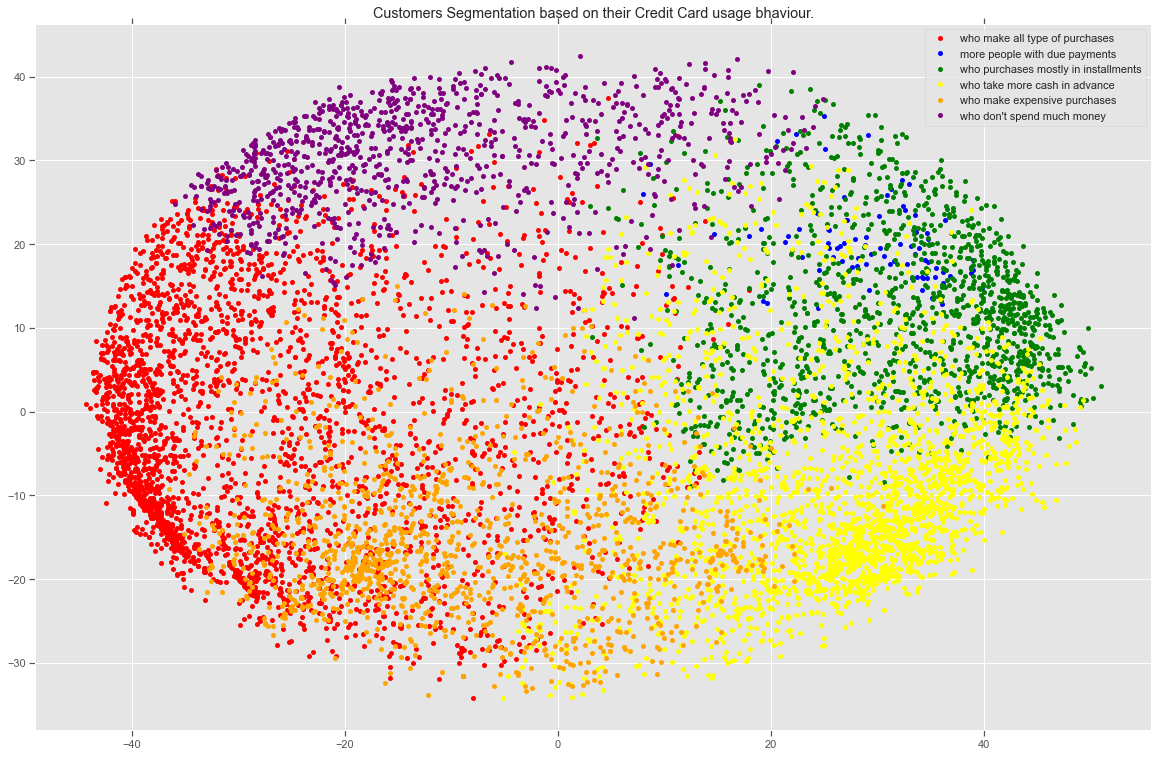

In [77]:
df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage bhaviour.")
plt.show()

(array([], dtype=int64), array([], dtype=int64))


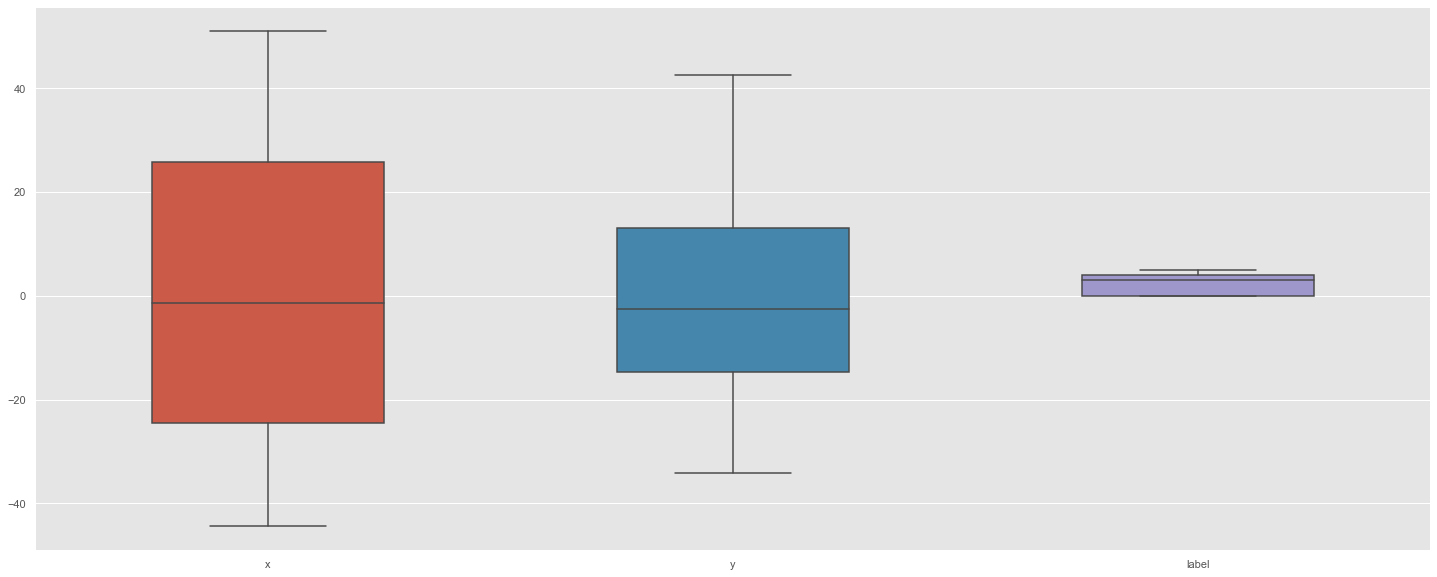

In [78]:
from scipy import stats
import numpy as np
df= df
z = np.abs(stats.zscore(df))
threshold = 3
print(np.where(z > 3))
df1 = df[(z < 3).all(axis=1)]
fig, ax = plt.subplots(figsize=(25,10))
sns.boxplot(data=df1, width= 0.5,ax=ax,  fliersize=3)

(8950, 2)


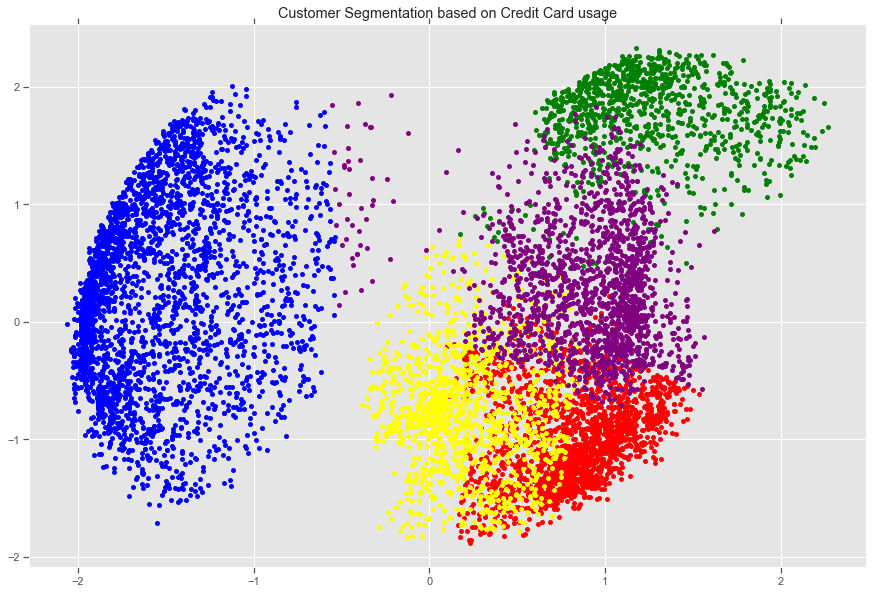

In [79]:
X = scaler.fit_transform(df1)
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 50)
y_kmeans = kmeans.fit_predict(X)
labels = kmeans.labels_

pca = PCA(2)
principalComponents = pca.fit_transform(X)
x, y = principalComponents[:, 0], principalComponents[:, 1]
print(principalComponents.shape)

colors = {0: 'red', 1: 'blue', 2: 'green', 3: 'yellow', 4: 'purple'}
final_df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = final_df.groupby(labels)
fig, ax = plt.subplots(figsize=(15, 10)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5, color=colors[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.set_title("Customer Segmentation based on Credit Card usage")
plt.show()